### House Price Prediction

In [221]:
# To set reproducibilty in the page 
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)

In [223]:
# LOADING THE HOUSING DATA 
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

/var/folders/yg/d74x238x4s90pslyc9k7d_0c0000gn/T/ipykernel_63964/2383692941.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


#### Quick glance at data using head, info and dtypes 

In [225]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [227]:
housing.shape

(20640, 10)

In [229]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [231]:
housing["ocean_proximity"].value_counts().to_frame()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


I might be thinking of removing the island class level as there are just not enough enteries for it

In [233]:
# Quick statistical summaries on the dataset 
housing.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


What initially jumps out to me is that most of the numerical variables seem to be normally distributed.I could confirm with a histogram or a kde plot for these variables. Also there doesnt seem to be mssing values availble which is a good thing

In [235]:
# Checking for missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

These are 207 enteries missing for total bedrooms.  These missing values would be filled using the median value in the total bedroom column

In [237]:
# Dealing with missing value in total bedroom column 
median_total_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median_total_bedrooms)

#### Distibutions of the dataset 

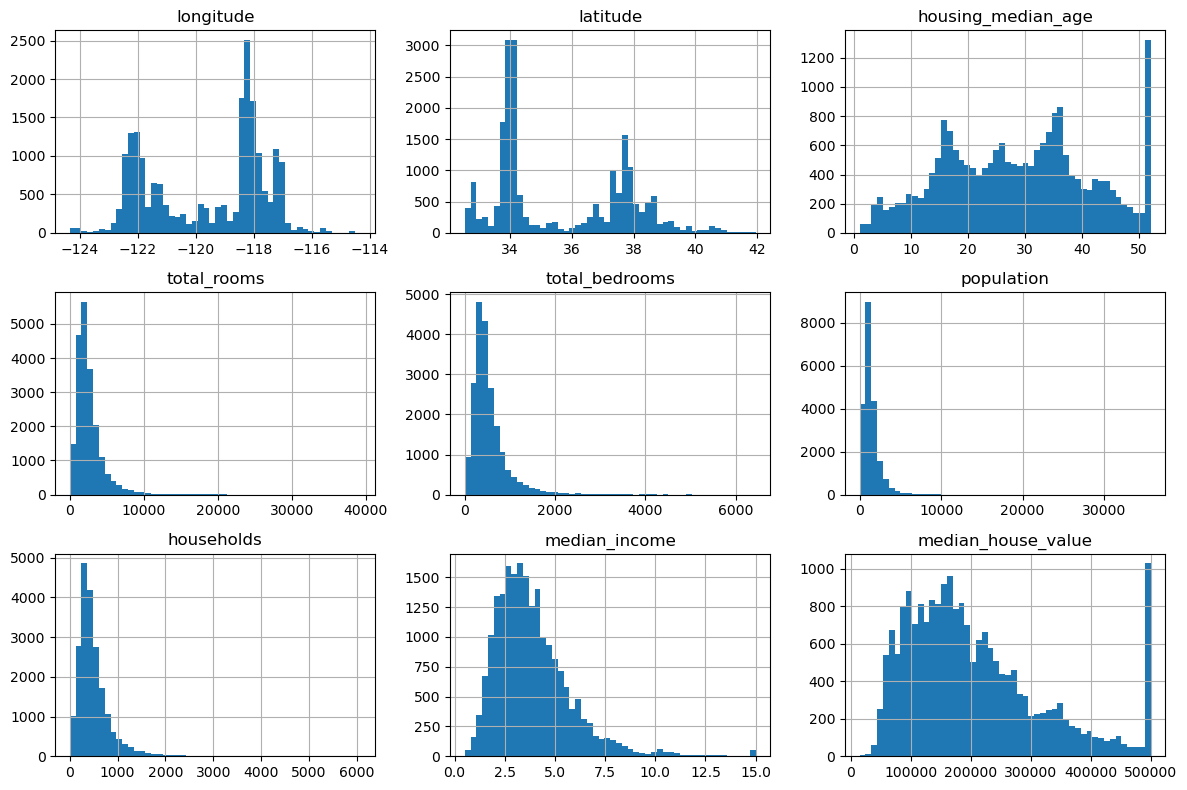

In [239]:
# Histograms for the numerical variables 
housing.hist(bins = 50,figsize=(12,8))  # the more teh bins the more we can see whether the shape is normallly distributed or not 
plt.tight_layout()


#### Quick insights from the distribution of the numercial variables 
- There seems to be a clear outlier in the median house value causing the skewness of the feature to tilt slight to the right even though it is clearly left skewed
- Overall trends in the distributions show clear left skewness hence most of values for each of the columns are on the lower end.

<Axes: xlabel='longitude', ylabel='latitude'>

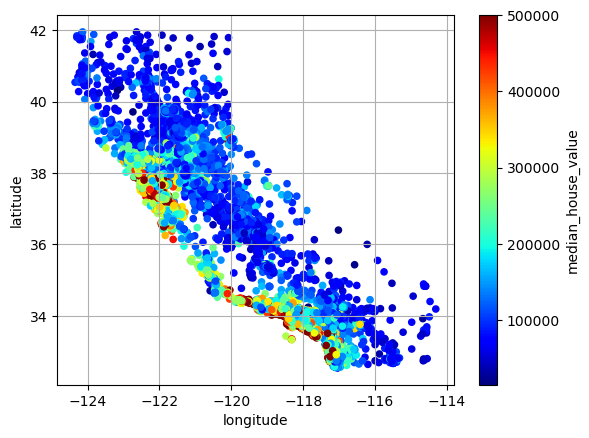

In [241]:
# More visualizations 
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', cmap = 'jet', grid = True,
            c= 'median_house_value')

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

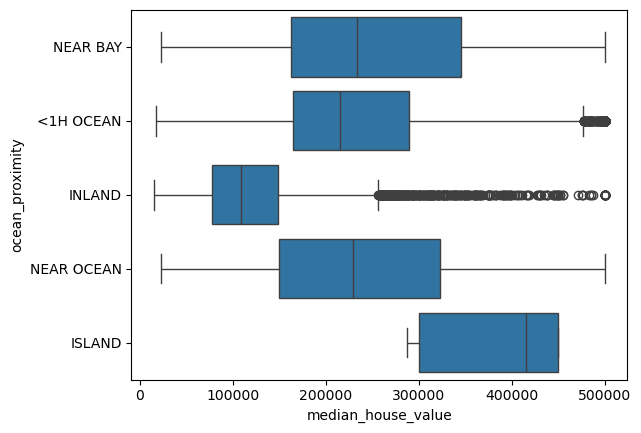

In [243]:
# boxplot 
sns.boxplot(x='median_house_value', y = 'ocean_proximity', data=housing)

In [95]:
np.random.seed(42)

Correlational Analysis 


In [245]:
corr_matrix = housing.select_dtypes(include = ['float64']).corr()
corr_matrix['median_house_value'].sort_values(ascending = False) 

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [247]:
# Quick analysis between ocean proximity and median house value to see whether
#there is a relationship between the ocean proximity and house prices 
house_value_by_proximity = housing.groupby('ocean_proximity')['median_house_value'].mean()
house_value_by_proximity 

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

Island with fewer than 10 enteries shows higher than avergae median house value compared to the rest of the other
categorical levels. Hence is understandable as houses on islands could be significantly more expensive. Even though there are not a lot of enteries for islands, it could still prove to be an important signal. Model evalustion could determine how importan this feature is to the overall predictive ability of our model 

In [249]:
# Performing ANOVA analysis on ocean proximity and median house value to find if there is relationship between both columns 
from scipy.stats import f_oneway
groups = []
for proximity in housing['ocean_proximity'].unique():
    proximity_groups = housing[housing['ocean_proximity'] == proximity]['median_house_value']
    groups.append(proximity_groups)
f_stat, p_value = f_oneway(*groups)
print(f' the f-statistic is {f_stat} and the pvalue is {p_value}')

 the f-statistic is 1612.1407358838223 and the pvalue is 0.0


From anova anlaysis there is a differnce between the medidan house value and ocean proximity 

### Feature Engineering 

In [251]:
# Rooms per household
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing = housing.drop('total_rooms',axis = 1) 

In [253]:
# Bedrooms per household
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households']
housing = housing.drop('total_bedrooms',axis = 1) 

In [255]:
# People per household
housing['people_per_household'] = housing['population']/housing['households']
housing = housing.drop('population',axis = 1) 

In [257]:
# dropping ocean proximity and the longitude and latitude columns
housing = housing.drop(columns=['latitude','longitude'],axis = 1)

In [259]:
housing.head(5)

,housing_median_age,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,people_per_household
0,41.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,21.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,52.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,52.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,52.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [263]:
# New correlational analysis with featured columns 
corr_matrix_new = housing.select_dtypes(include='number').corr()
corr_matrix_new['median_house_value'].sort_values(ascending = False) 

median_house_value        1.000000
median_income             0.688075
rooms_per_household       0.151948
housing_median_age        0.105623
households                0.065843
people_per_household     -0.023737
bedrooms_per_household   -0.045637
Name: median_house_value, dtype: float64

#### Train Test Split on the data 

In [265]:
# Establishing the target variable
X = housing.drop('median_house_value', axis = 1) 
y = housing['median_house_value']

In [267]:
#Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [284]:
# Standard Scaling on only the numerical features without the categorical column 
#Numerical and categorical columns 
from sklearn.preprocessing import StandardScaler
num_columns = X.select_dtypes(include ='float64').columns
cat_columns = X.select_dtypes(include ='object').columns

#Splitting training and test sets into numerical and categorical columns 
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns] 

# Performing one hot encoder on the catgeorical columns 
encoder = OneHotEncoder(sparse_output=False, drop='first') 
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)


#Performing Standard Scaling on the numerical features 
std = StandardScaler() 
X_train_scaled = std.fit_transform(X_train_num)
X_test_scaled = std.transform(X_test_num) 


# Concatenating both 
X_train_full = np.concatenate([X_train_scaled, X_train_encoded], axis = 1)
X_test_full = np.concatenate([X_test_scaled,X_test_encoded],axis = 1) 

# Pandas Dataframe 
X_train_df = pd.DataFrame(X_train_full)
X_test_df = pd.DataFrame(X_test_full)

### Linear Regression 

In [288]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression() 
linreg.fit(X_train_df,y_train) 

LinearRegression()

In [324]:
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

#Cross Validation on the training data 
scores = cross_val_score(linreg, X_train_df,y_train,cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
scores_r2 = cross_val_score(linreg,X_train_df,y_train,cv = 5, scoring='r2')
print(f'the rmse average on the training data {rmse_scores.mean()} and the average r-squared {scores_r2.mean()}')

the rmse average on the training data 72539.47156737202 and the average r-squared 0.6003815291411757


In [326]:
y_test_pred_linreg = linreg.predict(X_test_df)
rmse_score = root_mean_squared_error(y_test,y_test_pred)
r_coef_score = r2_score(y_test,y_test_pred)
print(f'the rmse for the testing data {rmse_score} and the r-squared {r_coef_score}')

the rmse for the testing data 60240.133723640574 and the r-squared 0.7382250520584289


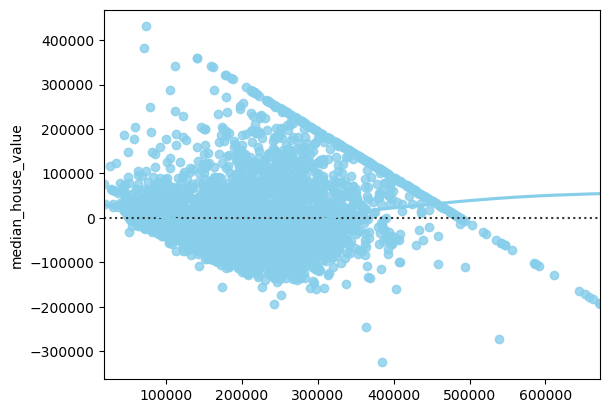

In [336]:
# Residual plot to establish linear relationship 
residuals = y_test - y_test_pred_linreg
sns.residplot(x = y_test_pred_linreg, y= residuals,color= 'skyblue', lowess=True)
plt.show()

Residual plot shows a slight curvature indicating a non linear realtionship is more appropriate with the dataset.
Hence instead of the linear Regression, non linear regression models might be more appropriate

### Random Forest Regressor 

In [311]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_df, y_train) 

RandomForestRegressor()

In [315]:
# Cross Validation on the training data 
scores = cross_val_score(rf,X_train_df,y_train,cv=5,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
scores_r2 = cross_val_score(rf,X_train_df,y_train,cv=5, scoring = 'r2')
print(f'The average rmse scores for training data is {rmse_scores.mean()} and the r_squared is {scores_r2.mean()}') 

The average rmse scores for training data is 59125.78091259049 and the r_squared is 0.7348830726553246


In [319]:
# Metrics on the testing data 
y_test_pred = rf.predict(X_test_df)
rmse_score = root_mean_squared_error(y_test,y_test_pred)
r_coef_score = r2_score(y_test,y_test_pred)
print(f'the rmse score for the testing data is {rmse_score} and the r_squared score is {r_coef_score}')

the rmse score for the testing data is 60240.133723640574 and the r_squared score is 0.7382250520584289


### XGBoost Regressor 

In [338]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
xgboost.fit(X_train_df, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [344]:
# Cross Validation with XGBoost Regressor 
scores_xgb = cross_val_score(xgboost,X_train_df,y_train,cv=5, scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores_xgb)
r_scores_xgb = cross_val_score(xgboost, X_train_df,y_train, cv=5, scoring = 'r2')
print(f'The average rmse for xgBoost regressor is {rmse_scores.mean()} and the r_sqaured scores mean is {r_scores_xgb.mean()}')

The averge rmse for xgBoost regressor is 60226.61133641908 and the r_sqaured scores mean is 0.7246187009555435


In [349]:
# Metrics on the testing data
y_test_pred = xgboost.predict(X_test_df)
rmse_xgb = root_mean_squared_error(y_test,y_test_pred)
r_scores_xgb = r2_score(y_test,y_test_pred)
print(f'The rmse score for testing data is {rmse_xgb} and the r-sqaured score is {r_scores_xgb}')

The rmse score for testing data is 60670.40983705228 and the r-sqaured score is 0.7344721464786623


### K-Nearest Neighbors

In [352]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_df,y_train)

KNeighborsRegressor()

In [354]:
# Cross Validation on training data with KNN 
scores = cross_val_score(knn, X_train_df,y_train,cv=5, scoring ='neg_mean_squared_error')
scores_rmse = np.sqrt(-scores)
r2scores = cross_val_score(knn, X_train_df,y_train,cv=5, scoring ='r2')
print(f'The rmse score for training data is {scores_rmse.mean()} and the r-sqaured score is {r2scores.mean()}')

The rmse score for training data is 68426.68505523363 and the r-sqaured score is 0.6443748344684492


### Removing outliers on the training data using Isolation Forest

In [359]:
# Performing isolation forest on the training data to remove outliers 
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
outliers = iso.fit_predict(X_train_df)
inliers = outliers == 1
X_train_df_clean = X_train_df[inliers]
y_train_clean = y_train[inliers]

- Performing model evaluation on Random Forest Regressor using the cleaned training data since it performed better than the other models
- After, GridSearchCV would be used to hyperparamter tune the Random Forest Model for potentially even better estimates 

In [370]:
# Random Forest Regressor on cleaned training data 
rf2 = RandomForestRegressor()
rf2.fit(X_train_df_clean, y_train_clean) 

RandomForestRegressor()

In [372]:
# Cross Validation on the training data 
scores = cross_val_score(rf2,X_train_df_clean,y_train_clean,cv=5,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
scores_r2 = cross_val_score(rf2,X_train_df_clean,y_train_clean,cv=5, scoring = 'r2')
print(f'The average rmse scores for training data is {rmse_scores.mean()} and the r_squared is {scores_r2.mean()}') 

The average rmse scores for training data is 56577.25061034081 and the r_squared is 0.7241579388857973


In [374]:
# Metrics on the testing data 
y_test_pred = rf2.predict(X_test_df)
rmse_score = root_mean_squared_error(y_test,y_test_pred)
r_coef_score = r2_score(y_test,y_test_pred)
print(f'the rmse score for the testing data is {rmse_score} and the r_squared score is {r_coef_score}')

the rmse score for the testing data is 60947.835169142854 and the r_squared score is 0.7320382557628982


- While there was a drop in rmse for the outlier free training data with random forest, the coefficient of determination however when down slighly, hence the metrics between random forest trained with outliers and without outliers difference were not that significant

### Hyperparameter Tuning with Random Forest using GridSearchCV 

In [380]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators' : [100,200,300],
               'max_depth' : [10,20,30,None],
               'min_samples_leaf' : [1,2,4],
               'min_samples_split' : [2,5,10],
               'max_features' : ['auto','sqrt'],
               'bootstrap' : [True, False]}

# Grid Search 
grid = GridSearchCV(rf2,param_grid = params_grid, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=2)
grid.fit(X_train_df_clean, y_train_clean)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_feat

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
796 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [388]:
best_model = grid.best_estimator_

In [390]:
# Metrics on hyperparamter tuning model
y_test_pred = best_model.predict(X_test_df)
rmse = root_mean_squared_error(y_test,y_test_pred)
print(f'the rmse on the testing with hyperparamter tuned random forest is {rmse}')

the rmse on the testing with hyperparamter tuned random forest is 59747.02066936187


### Model Interpretability

In [415]:
# Feature importance for predictions 
feature_importance = best_model.feature_importances_

In [413]:
# Assigning feature names to feature importance 
ohe_feature_name = encoder.get_feature_names_out(cat_columns)
numerical_feature_names = num_columns
all_feature_names = np.concatenate([ohe_feature_name,numerical_feature_names])

In [428]:
# Feature importance by feature 
feature_importance_df = pd.DataFrame({'feature' : all_feature_names, 'importance' : feature_importance})
feature_importance_df.sort_values(by = 'importance', ascending=False)

,feature,importance
2,ocean_proximity_NEAR BAY,0.379140
6,median_income,0.189789
5,households,0.145515
3,ocean_proximity_NEAR OCEAN,0.109461
0,ocean_proximity_INLAND,0.067812
4,housing_median_age,0.049452
1,ocean_proximity_ISLAND,0.047426
9,people_per_household,0.005897
8,bedrooms_per_household,0.005385
7,rooms_per_household,0.000124


- When splitting at the nodes, the random forest regressor model relied on ocean Proximity near the bay as its strongest signal in reducing the gini impurity and thus in its predictive capabablies. Nearly 40 percent in the decision making process was contributed by this feature. The next stronger in signal for predictive power was median income which was used about 20 percent of the time. 

- Less relevant features in the decision making proces were the engineered features (people_per_household, bedrooms_per_household,and rooms_per_houshold) 

### Saving Model 

In [422]:
import joblib

In [424]:
joblib.dump(best_model,"random_forest.pkl")

['random_forest.pkl']